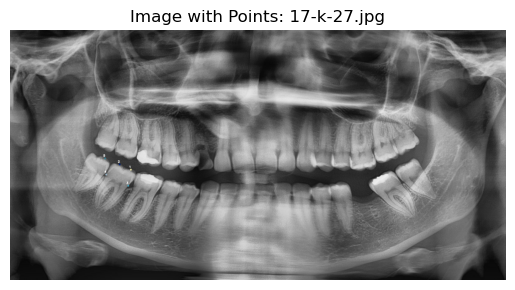

Done plotting points on images and saving modified images in the output folder.


In [1]:
import cv2
import os
import matplotlib.pyplot as plt
def plot_points_on_images(csv_file, image_dir, output_dir):
    """
    Plots points on images based on coordinates from a CSV file and saves modified images.

    Parameters:
        csv_file (str): Path to the CSV file containing coordinates.
        image_dir (str): Path to the folder containing images.
        output_dir (str): Path to the folder where modified images will be saved.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Loop through each row in the CSV file
    for index, row in df.iterrows():
        # Extract image name and coordinates
        image_name = row['IMAGE'] + '.jpg'  # Add the file extension
        image_path = os.path.join(image_dir, image_name)
        x_coordinates = [row[f'{i}-X'] for i in range(1, 6)]
        y_coordinates = [row[f'{i}-Y'] for i in range(1, 6)]

        # Read the image
        img = cv2.imread(image_path)

        # Draw points on the image for each set of coordinates
        for i, (x, y) in enumerate(zip(x_coordinates, y_coordinates), 1):
            # Generate a unique color for each point
            color = tuple(np.random.randint(0, 256, 3).tolist())

            # Increase the size of the dot
            cv2.circle(img, (int(x), int(y)), 5, color, -1)

            # Label the point with a number
            cv2.putText(img, str(i), (int(x) - 10, int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Save the modified image in the output folder
        output_path = os.path.join(output_dir, f"modified_{image_name}")
        cv2.imwrite(output_path, img)

        # Display the image with points using matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"Image with Points: {image_name}")
        plt.axis('off')
        plt.show()
        break;

    print("Done plotting points on images and saving modified images in the output folder.")

# Define the paths to your CSV file, image directory, and output directory
CSV_FILE = './data/coordinates/47-48-ilk.csv'
IMAGE_DIR = './data/images/47-48-ilk/'
OUTPUT_DIR = './data/output_images/'

# Call the function to plot points on images and save modified images
plot_points_on_images(CSV_FILE, IMAGE_DIR, OUTPUT_DIR)